In [1]:
import numpy as np 
import pandas as pd 
from pandas_datareader import data as wb 
import matplotlib.pyplot as plt
from prophet import Prophet
import yfinance as yf
plt.style.use('fivethirtyeight')
import statsmodels.api as sm

CTSH Stock (1/3/2018) to (1/3/2023)

In [2]:
myticker='CTSH'
df=pd.DataFrame()
df[myticker]=yf.download(myticker,start="2022-01-01",end="2022-12-31")['Adj Close']
df.columns = {'Close'}
df.head()

[*********************100%***********************]  1 of 1 completed


,Close
Date,
2022-01-03,87.823906
2022-01-04,89.637840
2022-01-05,88.265129
2022-01-06,86.510033
2022-01-07,85.715813


In [3]:
df=df.reset_index()
df[['ds','y']]=df[['Date','Close']]
df


,Date,Close,ds,y
0,2022-01-03,87.823906,2022-01-03,87.823906
1,2022-01-04,89.637840,2022-01-04,89.637840
2,2022-01-05,88.265129,2022-01-05,88.265129
3,2022-01-06,86.510033,2022-01-06,86.510033
4,2022-01-07,85.715813,2022-01-07,85.715813
...,...,...,...,...
246,2022-12-23,55.777996,2022-12-23,55.777996
247,2022-12-27,56.236008,2022-12-27,56.236008
248,2022-12-28,55.339897,2022-12-28,55.339897
249,2022-12-29,56.883202,2022-12-29,56.883202


In [4]:
model = Prophet()

In [5]:
prophet_df=df.drop(['Date','Close'],axis=1)
prophet_df

,ds,y
0,2022-01-03,87.823906
1,2022-01-04,89.637840
2,2022-01-05,88.265129
3,2022-01-06,86.510033
4,2022-01-07,85.715813
...,...,...
246,2022-12-23,55.777996
247,2022-12-27,56.236008
248,2022-12-28,55.339897
249,2022-12-29,56.883202


Text(0.5, 0, 'Date')

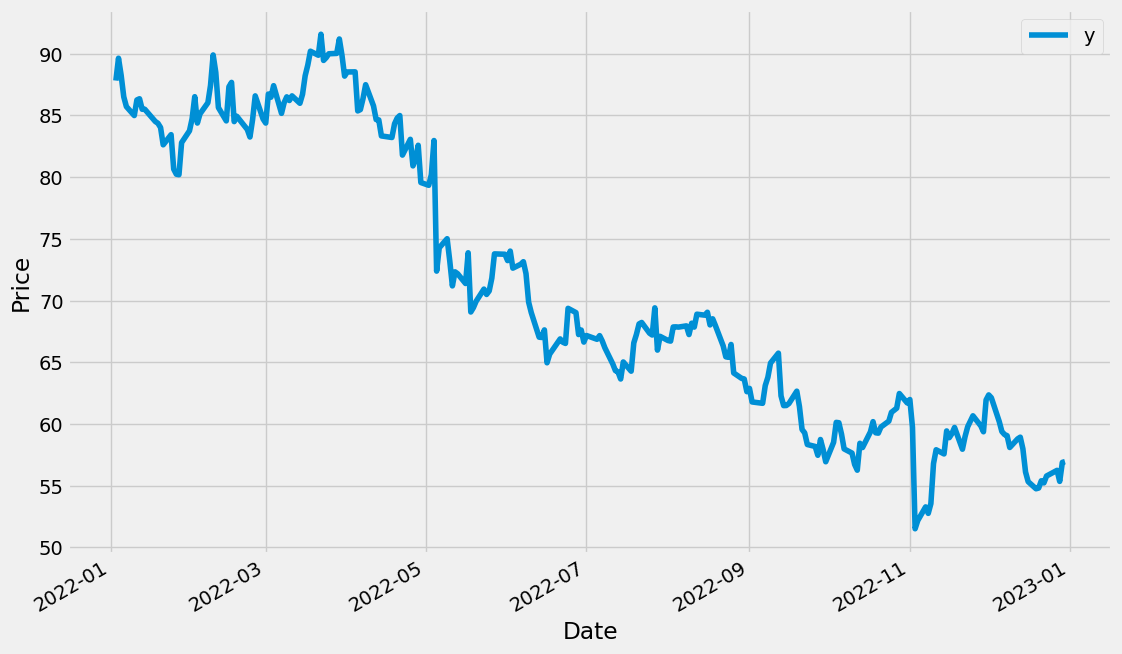

In [6]:
ax=prophet_df.set_index('ds').plot(figsize=(12,8))
ax.set_ylabel('Price')
ax.set_xlabel('Date')

In [7]:
model.fit(prophet_df)

03:08:48 - cmdstanpy - INFO - Chain [1] start processing
03:08:48 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
future=model.make_future_dataframe(periods=365)

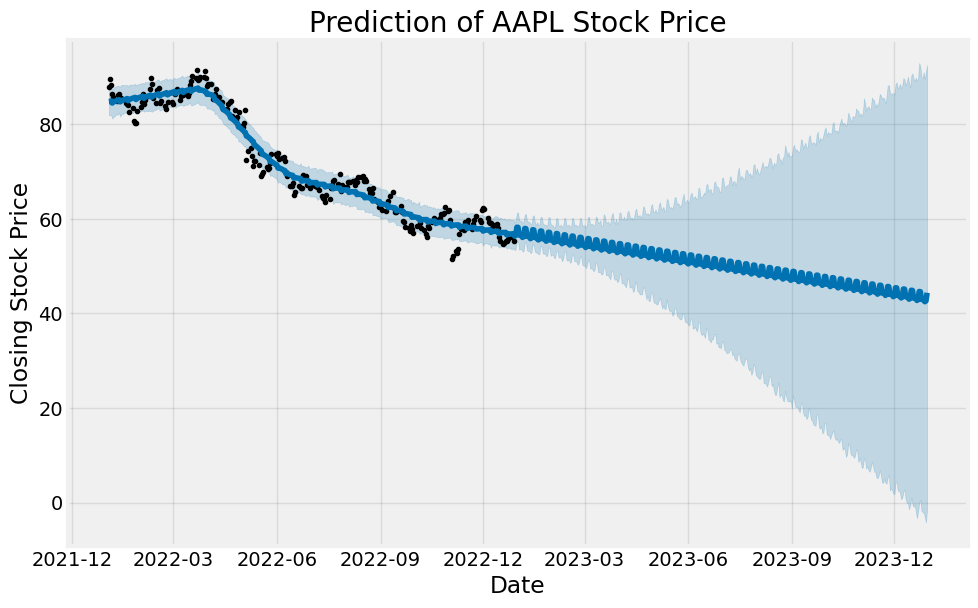

,ds,yhat,yhat_lower,yhat_upper
611,2023-12-26,42.951089,-1.993450,89.759255
612,2023-12-27,43.016194,-2.195715,91.056280
613,2023-12-28,42.480877,-3.057216,89.529292
614,2023-12-29,42.657447,-4.251145,91.185861
615,2023-12-30,44.371316,-1.513543,92.539453


In [9]:
predictions = model.predict(future)
model.plot(predictions)
plt.title("Prediction of AAPL Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

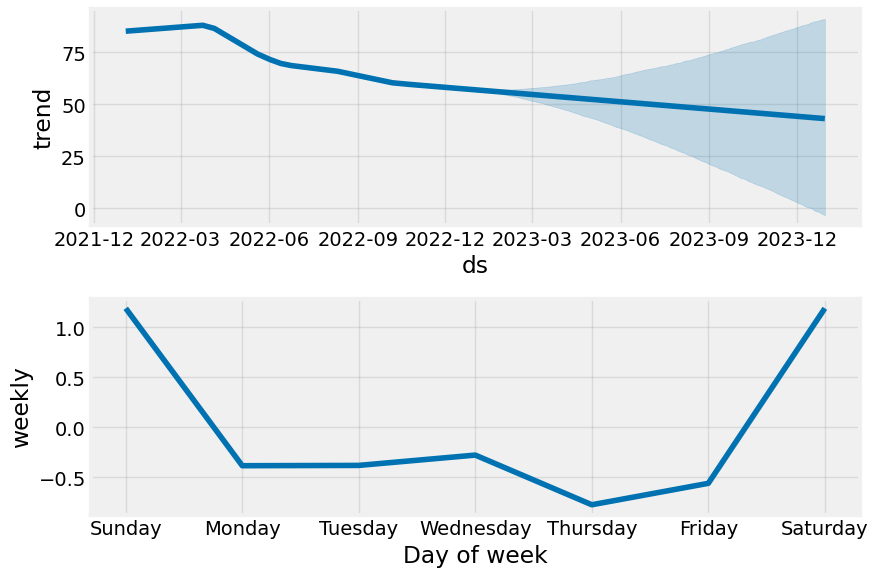

In [10]:
model.plot_components(predictions)
plt.show()